# Combining Multiple Charts in a Grid

This section showcases how to combine multiple charts into a grid layout using the [datachart.utils.combine_figures](/references/utils/#datachart.utils.combine_figures) function.

The examples sequentially build on each other, going from simple to more complex.

In [1]:
import numpy as np

## Introduction

The `combine_figures` function allows you to combine multiple chart figures into a single grid layout. This is useful when you want to:

- Compare multiple datasets side by side
- Create dashboards with different chart types
- Display related visualizations together
- Share axes across multiple charts for easier comparison

Let's start by importing the necessary functions:

In [2]:
from datachart.utils import combine_figures
from datachart.charts import LineChart, BarChart, ScatterChart

from datachart.constants import FIG_SIZE

## Function Parameters

The `combine_figures` function accepts the following parameters:

| Parameter | Type | Description |
| :-------- | :--- | :----------- |
| `figures` | `List[plt.Figure]` | List of matplotlib Figure objects to combine. Each figure must have `_chart_metadata` attribute (automatically added by datachart chart functions). |
| `title` | `Optional[str]` | Optional title for the combined figure. |
| `max_cols` | `Optional[int]` | Maximum number of columns in the grid layout (default: 4). |
| `figsize` | `Optional[Tuple[float, float]]` | Size of the combined figure (width, height) in inches. If None, will be calculated based on input figures. |
| `sharex` | `Optional[bool]` | Whether to share the x-axis across all subplots (default: False). |
| `sharey` | `Optional[bool]` | Whether to share the y-axis across all subplots (default: False). |

For more details, see the [datachart.utils.combine_figures](/references/utils/#datachart.utils.combine_figures) function documentation.

## Basic Grid Layout

The simplest way to combine charts is to create individual charts and then combine them into a grid. The `combine_figures` function automatically arranges them in a grid layout.

### Combining Two Charts

Let's start with a simple example combining two line charts:

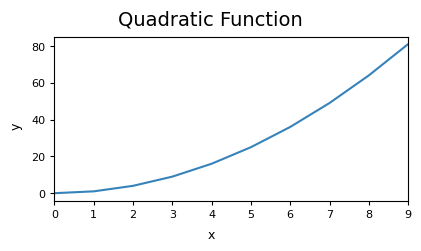

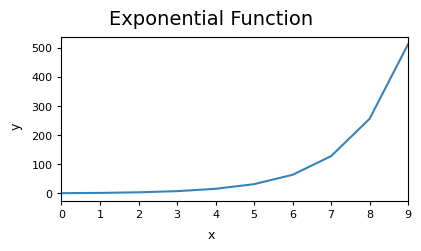

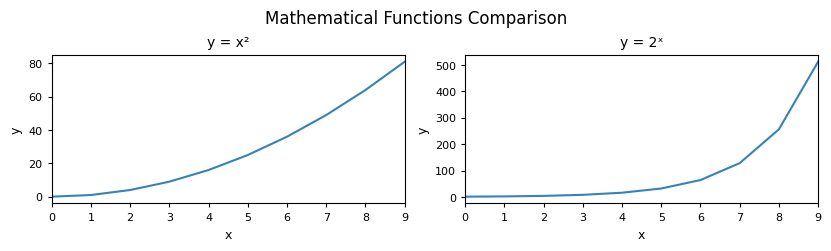

In [3]:
# Create two individual line charts
fig1 = LineChart(
    data=[{"x": i, "y": i**2} for i in range(10)],
    title="Quadratic Function",
    subtitle="y = x²",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = LineChart(
    data=[{"x": i, "y": 2**i} for i in range(10)],
    title="Exponential Function",
    subtitle="y = 2ˣ",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine into a grid
combined = combine_figures(
    [fig1, fig2],
    title="Mathematical Functions Comparison",
    max_cols=2
)

### Combining Multiple Charts

You can combine any number of charts. The function automatically calculates the grid layout based on the `max_cols` parameter:

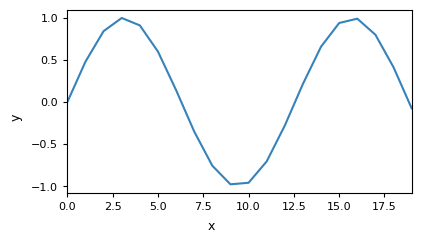

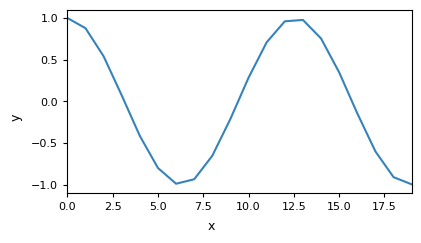

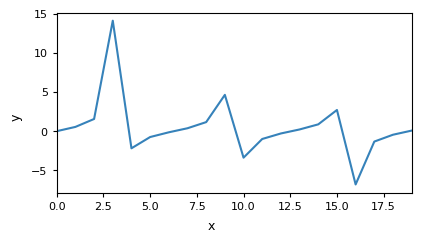

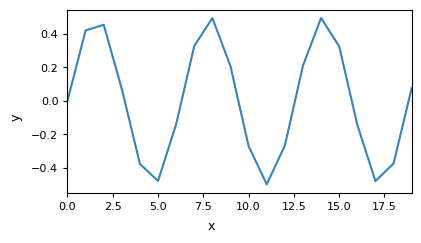

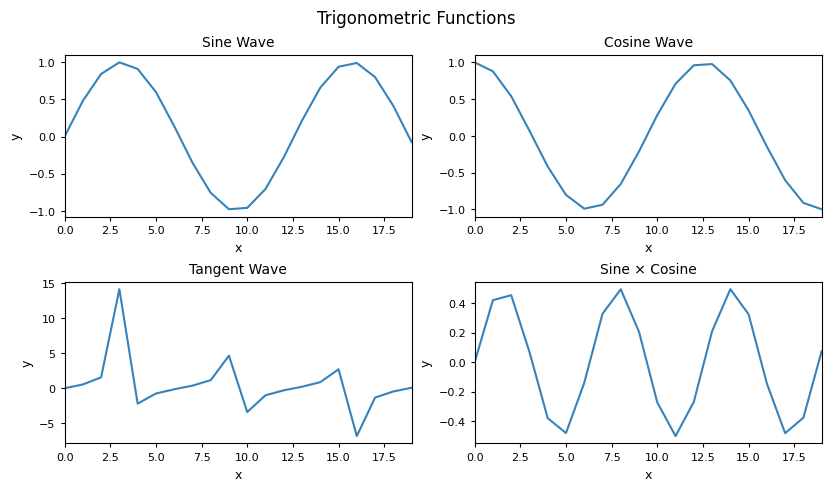

In [4]:
# Create multiple charts
fig1 = LineChart(
    data=[{"x": i, "y": np.sin(i/2)} for i in range(20)],
    subtitle="Sine Wave",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = LineChart(
    data=[{"x": i, "y": np.cos(i/2)} for i in range(20)],
    subtitle="Cosine Wave",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig3 = LineChart(
    data=[{"x": i, "y": np.tan(i/2)} for i in range(20)],
    subtitle="Tangent Wave",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig4 = LineChart(
    data=[{"x": i, "y": np.sin(i/2) * np.cos(i/2)} for i in range(20)],
    subtitle="Sine × Cosine",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine into a 2x2 grid
combined = combine_figures(
    [fig1, fig2, fig3, fig4],
    title="Trigonometric Functions",
    max_cols=2
)

## Customizing Grid Layout

### Setting Maximum Columns

The `max_cols` parameter controls the maximum number of columns in the grid. The function automatically calculates the number of rows needed:

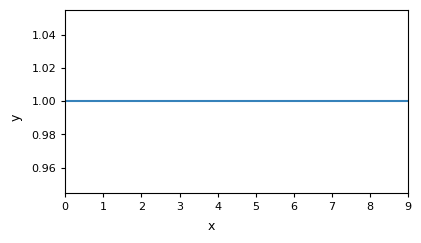

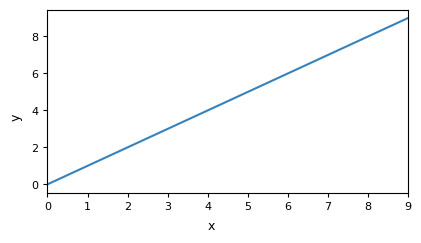

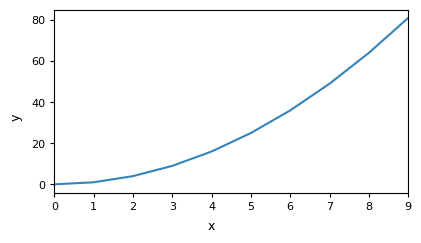

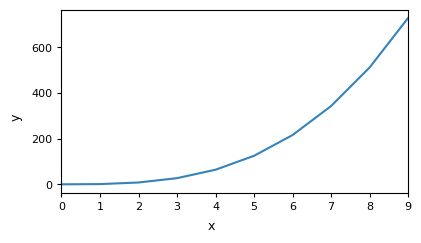

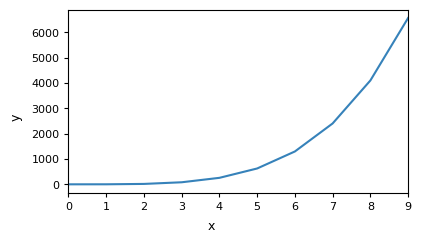

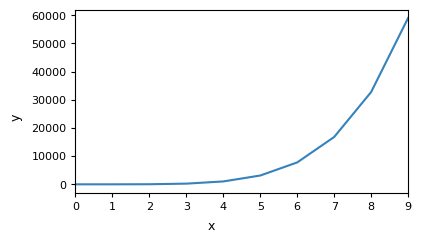

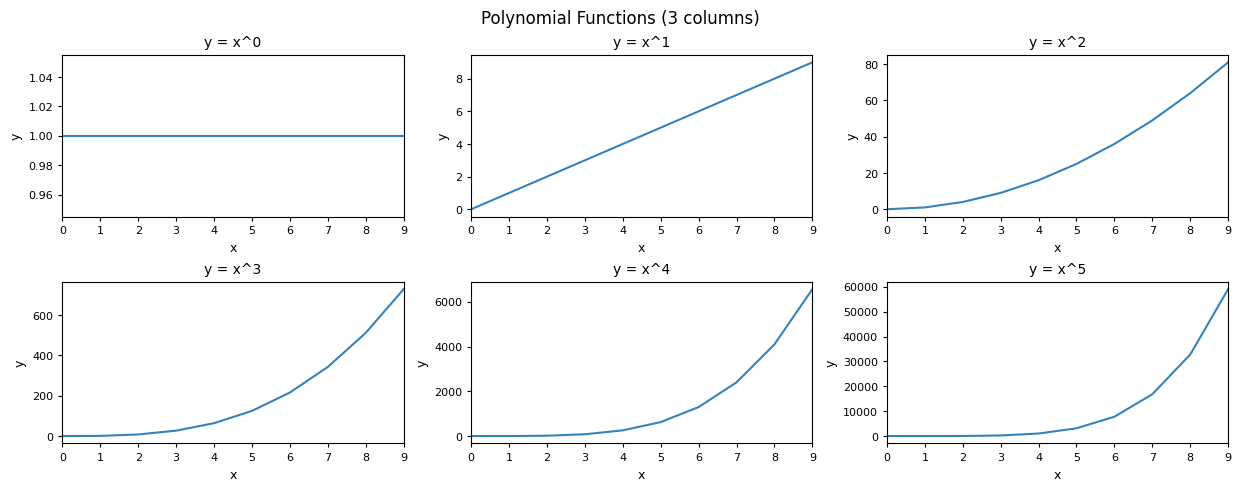

In [5]:
# Create 6 charts
charts = []
for i in range(6):
    fig = LineChart(
        data=[{"x": j, "y": j**i} for j in range(10)],
        subtitle=f"y = x^{i}",
        xlabel="x",
        ylabel="y",
        figsize=FIG_SIZE.A4_HALF_NARROW,
    )
    charts.append(fig)

# Combine with max_cols=3 (creates a 2x3 grid)
combined = combine_figures(
    charts,
    title="Polynomial Functions (3 columns)",
    max_cols=3
)

### Custom Figure Size

You can specify a custom figure size for the combined chart:

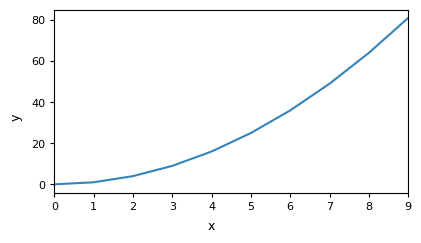

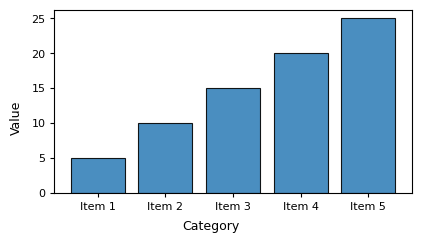

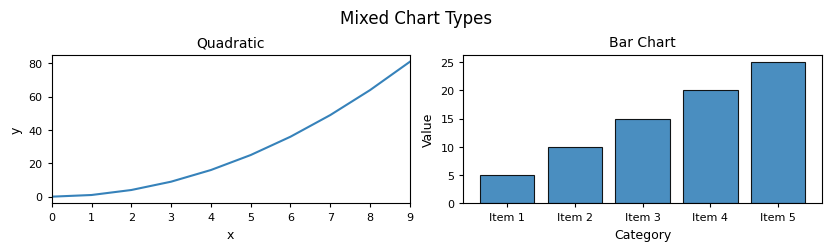

In [6]:
fig1 = LineChart(
    data=[{"x": i, "y": i**2} for i in range(10)],
    subtitle="Quadratic",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = BarChart(
    data=[{"label": f"Item {i}", "y": i*5} for i in range(1, 6)],
    subtitle="Bar Chart",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine with custom figure size
combined = combine_figures(
    [fig1, fig2],
    title="Mixed Chart Types",
    max_cols=2,
    figsize=FIG_SIZE.A4_NARROW
)

## Sharing Axes

When comparing charts with the same scale, you can share axes across all subplots for easier comparison:

### Sharing X-Axis

Use `sharex=True` to share the x-axis across all charts:

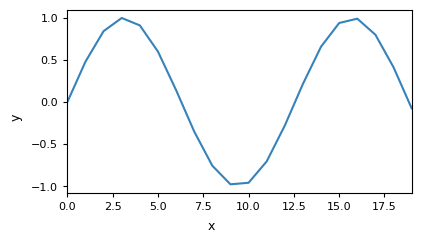

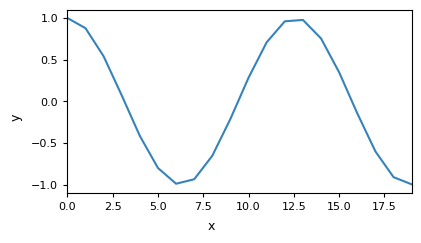

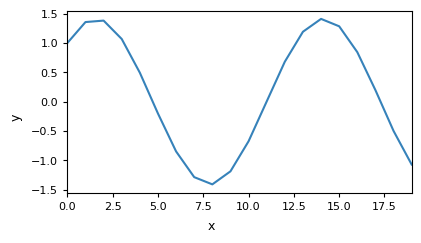

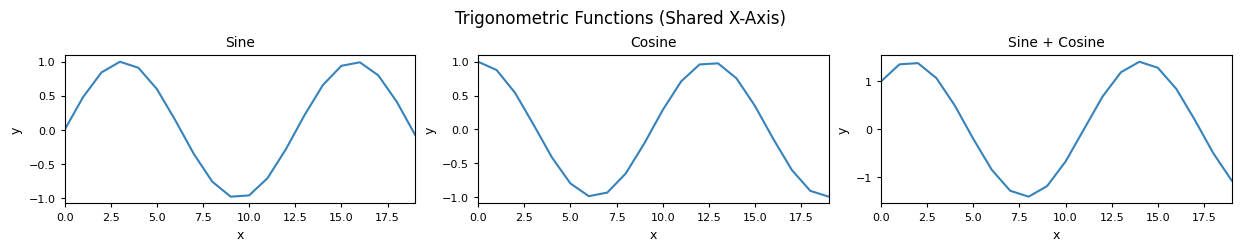

In [7]:
# Create charts with the same x-axis range
fig1 = LineChart(
    data=[{"x": i, "y": np.sin(i/2)} for i in range(20)],
    subtitle="Sine",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = LineChart(
    data=[{"x": i, "y": np.cos(i/2)} for i in range(20)],
    subtitle="Cosine",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig3 = LineChart(
    data=[{"x": i, "y": np.sin(i/2) + np.cos(i/2)} for i in range(20)],
    subtitle="Sine + Cosine",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine with shared x-axis
combined = combine_figures(
    [fig1, fig2, fig3],
    title="Trigonometric Functions (Shared X-Axis)",
    max_cols=3,
    sharex=True
)

### Sharing Y-Axis

Use `sharey=True` to share the y-axis across all charts:

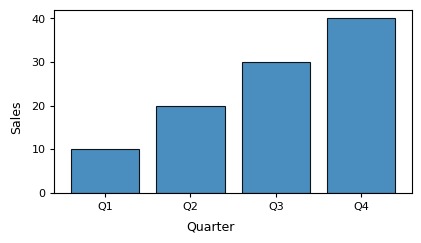

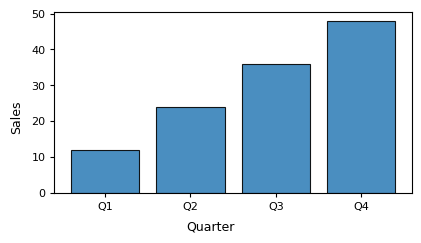

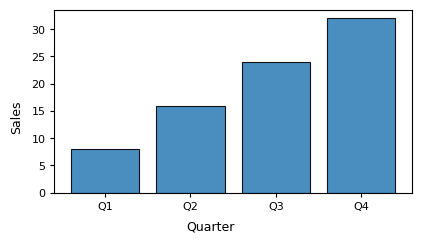

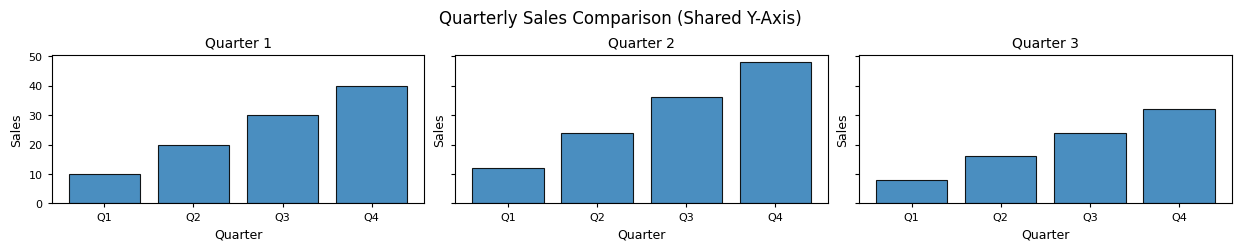

In [8]:
# Create charts with the same y-axis range
fig1 = BarChart(
    data=[{"label": f"Q{i+1}", "y": (i+1)*10} for i in range(4)],
    subtitle="Quarter 1",
    xlabel="Quarter",
    ylabel="Sales",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = BarChart(
    data=[{"label": f"Q{i+1}", "y": (i+1)*12} for i in range(4)],
    subtitle="Quarter 2",
    xlabel="Quarter",
    ylabel="Sales",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig3 = BarChart(
    data=[{"label": f"Q{i+1}", "y": (i+1)*8} for i in range(4)],
    subtitle="Quarter 3",
    xlabel="Quarter",
    ylabel="Sales",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine with shared y-axis
combined = combine_figures(
    [fig1, fig2, fig3],
    title="Quarterly Sales Comparison (Shared Y-Axis)",
    max_cols=3,
    sharey=True
)

### Sharing Both Axes

You can share both x and y axes:

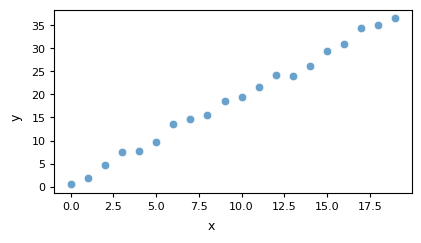

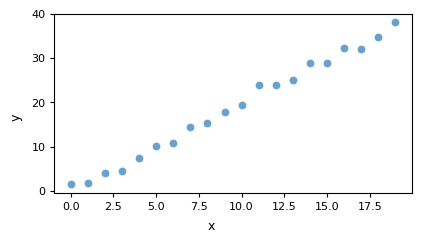

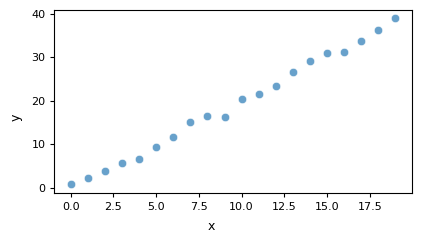

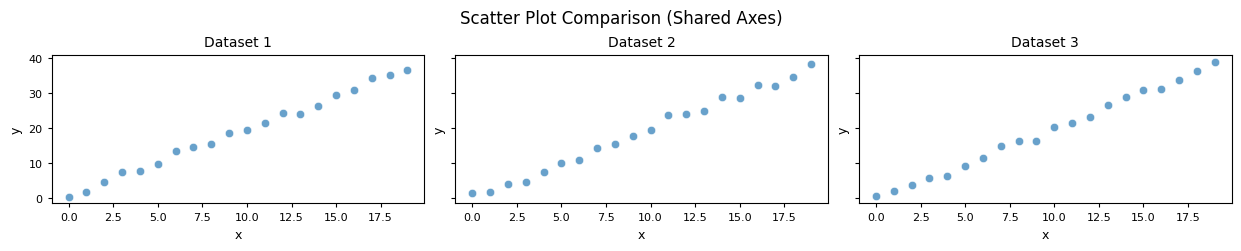

In [9]:
# Create scatter charts with the same scale
np.random.seed(42)
fig1 = ScatterChart(
    data=[{"x": i, "y": i*2 + np.random.normal(0, 1)} for i in range(20)],
    subtitle="Dataset 1",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig2 = ScatterChart(
    data=[{"x": i, "y": i*2 + np.random.normal(0, 1)} for i in range(20)],
    subtitle="Dataset 2",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

fig3 = ScatterChart(
    data=[{"x": i, "y": i*2 + np.random.normal(0, 1)} for i in range(20)],
    subtitle="Dataset 3",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine with shared axes
combined = combine_figures(
    [fig1, fig2, fig3],
    title="Scatter Plot Comparison (Shared Axes)",
    max_cols=3,
    sharex=True,
    sharey=True
)

## Mixing Different Chart Types

One of the powerful features of `combine_figures` is that you can combine different chart types in the same grid:

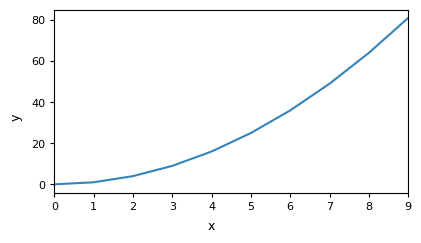

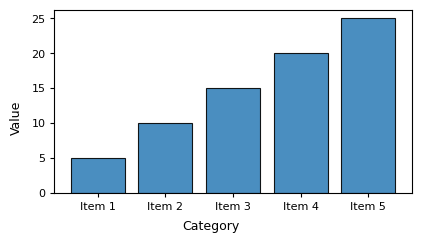

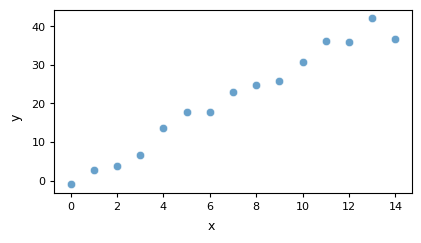

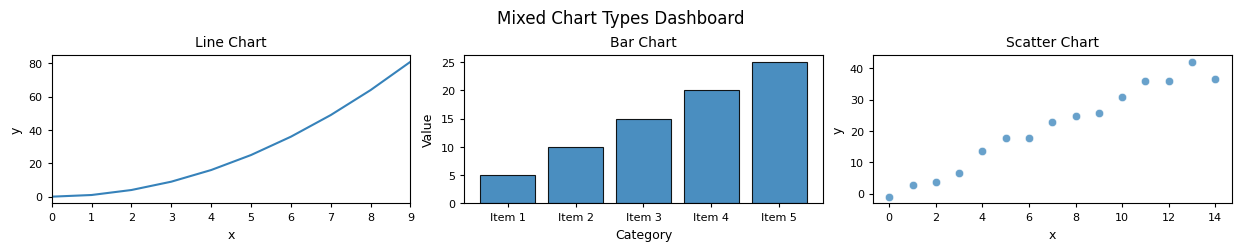

In [10]:
# Create different chart types
line_fig = LineChart(
    data=[{"x": i, "y": i**2} for i in range(10)],
    subtitle="Line Chart",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

bar_fig = BarChart(
    data=[{"label": f"Item {i}", "y": i*5} for i in range(1, 6)],
    subtitle="Bar Chart",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

scatter_fig = ScatterChart(
    data=[{"x": i, "y": i*3 + np.random.normal(0, 2)} for i in range(15)],
    subtitle="Scatter Chart",
    xlabel="x",
    ylabel="y",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine different chart types
combined = combine_figures(
    [line_fig, bar_fig, scatter_fig],
    title="Mixed Chart Types Dashboard",
    max_cols=3
)

## Complete Example: Data Analysis Dashboard

Here's a complete example creating a dashboard with multiple related visualizations:

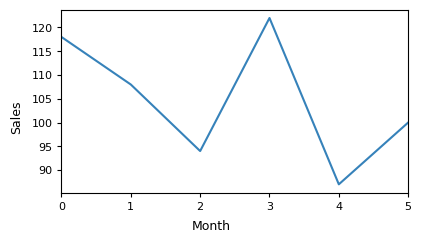

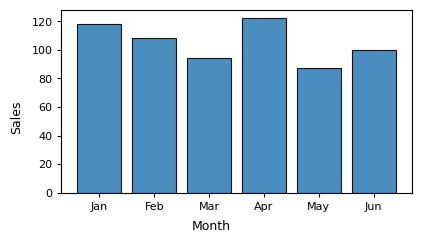

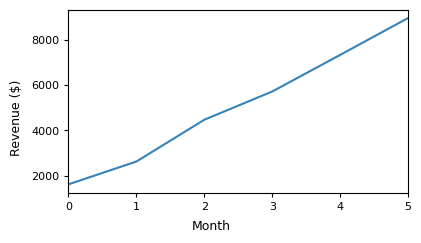

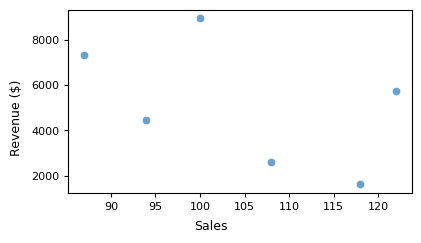

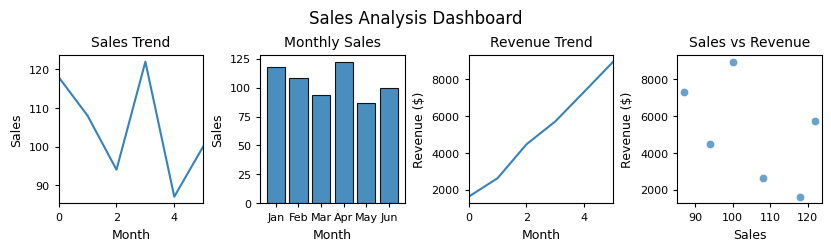

In [11]:
# Generate sample data
np.random.seed(42)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]
sales_data = [100 + np.random.randint(-20, 30) for _ in months]
revenue_data = [i*1500 + np.random.randint(-500, 500) for i in range(1, 7)]

# Create individual charts
trend_fig = LineChart(
    data=[{"x": i, "y": sales_data[i]} for i in range(len(months))],
    subtitle="Sales Trend",
    xlabel="Month",
    ylabel="Sales",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

bar_fig = BarChart(
    data=[{"label": months[i], "y": sales_data[i]} for i in range(len(months))],
    subtitle="Monthly Sales",
    xlabel="Month",
    ylabel="Sales",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

revenue_fig = LineChart(
    data=[{"x": i, "y": revenue_data[i]} for i in range(len(months))],
    subtitle="Revenue Trend",
    xlabel="Month",
    ylabel="Revenue ($)",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

scatter_fig = ScatterChart(
    data=[{"x": sales_data[i], "y": revenue_data[i]} for i in range(len(months))],
    subtitle="Sales vs Revenue",
    xlabel="Sales",
    ylabel="Revenue ($)",
    figsize=FIG_SIZE.A4_HALF_NARROW,
)

# Combine into dashboard
dashboard = combine_figures(
    [trend_fig, bar_fig, revenue_fig, scatter_fig],
    title="Sales Analysis Dashboard",
    max_cols=4,
    figsize=FIG_SIZE.A4_NARROW
)

## Notes

- Each chart figure must be created using a datachart chart function (e.g., `LineChart`, `BarChart`, `ScatterChart`) to have the required metadata.
- The function automatically calculates the number of rows based on the number of figures and `max_cols`.
- Unused grid positions are automatically hidden.
- Individual chart titles (from the `title` parameter) are used as subtitles in the grid, while the `title` parameter of `combine_figures` becomes the overall figure title.
- Chart-specific labels (xlabel, ylabel, subtitle) from individual charts are preserved in the grid layout.